<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/2_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* # Градиентный спуск


* #### Минимизация квадратичной функции

In [ ]:
# 1. Выбираем исходную точку
# 2. Считаем градиент в этой точке
# 3. Делаем шаг в сторону антиградиента с learning rate = lr
#  * Повторяем 2 и 3 шаги, пока не выполнится одно из условий:
#  * Количество итераций превысило максимальное
#  * Размер шага имеет довольно маленькое значение, не меняется на протяжении многих итераций

import numpy as np
# задаем функцию
def f(x):
    return (x) ** 2
# производная(градиент)
def f_grad(x):
    return 2 * x

# тут параметры функции(стартовая точка, количество шагов(максимальное), длина шага, допустимое изменение функции)
def gradient_descent(x_init, n_iterations=10, lr=0.001, tol=1e-6):
    x = x_init # исходная точка
    x_history = [x] # тут мы храним "историю" Х, т.е. те значения, которые он принима в каждой итерации
    iter = 0 # номер итерации(счетчик)

    while iter < n_iterations:
        diff = lr * f_grad(x) 
        x = x - diff

        x_history.append(x)
        iter += 1

        if np.abs(diff) < tol:
            break
    
    return np.array(x_history)

# Так, про diff: функция f_grad(x) считает градиент, тут функция однеомерная, поэтому обычная произваодная по х, 
# один из смыслов производной - это отображение (скорости) эволюции функции в данной точке, например, все тот же x^2:
# производная будет равна 2 * х; в точке х = -1 производная равна 2 * (-1) = -2 - функция убывает, аналогично в точке х = 1 производная равна 2 - растет.
# Т.о. до х = 0 функция убывает, а потом растет.
#
# И вот весь цикл: посмотрели куда идет функция и умножили на длину шага, вычли это значение из нашей текущей позиции(х) (т.е пошли в сторону минимума) 
# добавили это значение в историю Х 
#
# проверили что если величина шага diff меньше заданной tol, то прерываем цикл, зачем? когда мы очень близко к минимуму скорость изменения функции становится меньше и меньше
# в какой-то момент теряется смысл совершать лишние итерации, тк примерно понятно, что тут минимум. И вот это примерно понятно устанавливается параметром tol
#
# на выходе отдаем набор Х, которые принимались за всю функцию 


Вызов и визуализация градиентного спуска

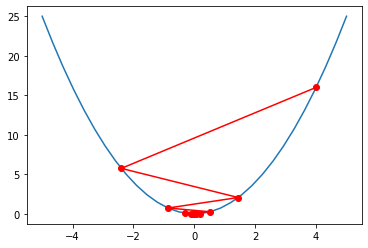

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_history = gradient_descent(x_init=4, n_iterations=100, lr=0.8)

x = np.linspace(-5, 5, 30) 

plt.plot(x, f(x))
plt.plot(x_history, f(x_history), 'ro-')

* #### Линейная регрессия

Смотри занятие по линейной регрессии
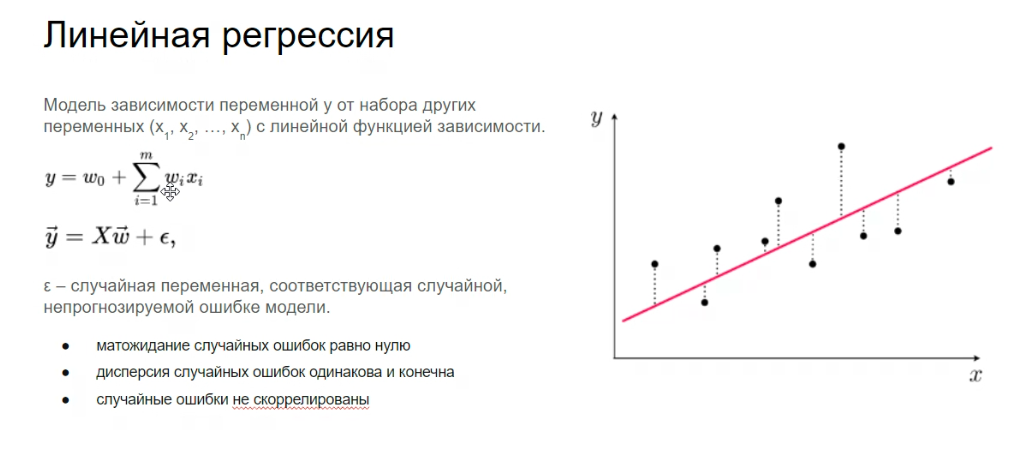

In [ ]:
# функция потерь. о чем она?
# у нас есть истинный "у" (y_true), а есть тот, что мы угадываем (y_pred), так вот ошибка между ними это разность, а чтоб не учитывать знак возводим в квадрат
# Если "у" много (для конкретики n), то сумма большого числа м.б больше выборки из малого числа(m), поэтому делим на количество "у" в выборке : (2+3+4)/3 = 3, (1+2+3+4+5+6+7+8+9)/9 = 5. 
# выборка чисел в примере больше в 3 раза, а итог меньше чем в 2 раза
def loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)


# градиент для функции потерь по w0 и w1 (взяли производные от выражения для loss по w0 и w1)
def loss_grad(x, y_true, w0, w1):
    grad_w0 = -2.0 * np.sum(y_true - (w0 + w1 * x)) / len(y_true)
    grad_w1 = -2.0 * np.sum((y_true - (w0 + w1 * x)) * x) / len(y_true)
    return grad_w0, grad_w1

# наш знакомы спуск, на вход: стартовые х,у, кол-во макс итераций (в нейросетках говорят эпохи), длина шага
def gradient_descent(x, y, epochs=10, lr=0.001):
    w0 = 0.0 # вес перед Х
    w1 = 0.0 # вес перед Х
    mse_history = [loss(y, w0 + w1 * x)] # сохраняем среднеквадратичные ошибки(функции потерь)
    epoch = 0 # эпоха (счетчик)
    while epoch < epochs:

        grad_w0, grad_w1 = loss_grad(x, y, w0, w1) # считаем градиент
        y_pred = w0 + w1 * x # вычисляем предсказанное у

        mse = loss(y, y_pred) #СКО
        mse_history.append(mse) # пополнили историю СКО

        w0 = w0 - lr * grad_w0 # тут сделали "шаги" в сторону оптимизации весов
        w1 = w1 - lr * grad_w1

        if epoch % 30 == 0: # каждые 30 эпох делается отчет: СКО, простановка точки (истинной и пресказанной), пауза
            print(mse)
            plt.plot(x, y, 'bo')
            plt.plot(x, w0 + w1 * x, 'r-')
            plt.pause(0.001)

        epoch += 1
    return w0, w1, mse_history

Делаем дата-сет и проверяем нашу регрессию с использованием спуска

В результате будет графики, на которых можно наблюдать эволюцию как прямая делает апроксимацию точек, каждые 30 эпох

5074.892100281431


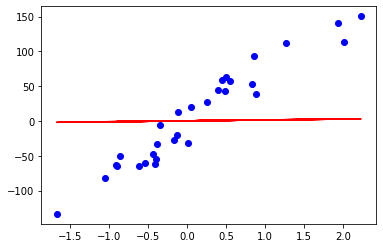

2037.6327604880494


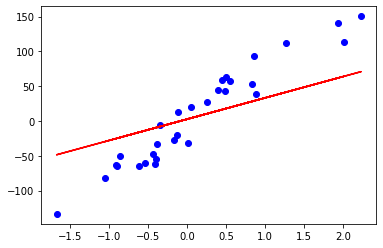

969.9874266544182


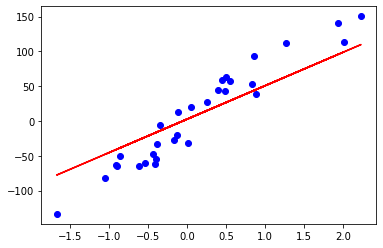

585.3052177301811


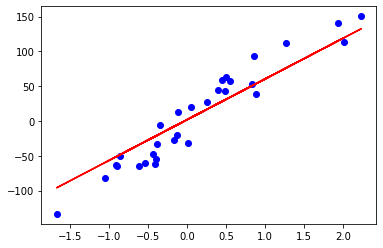

443.8677136454405


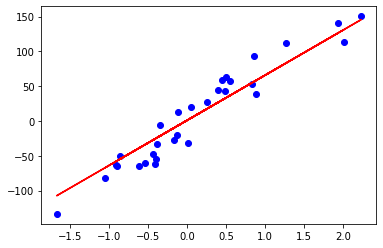

391.03077827176264


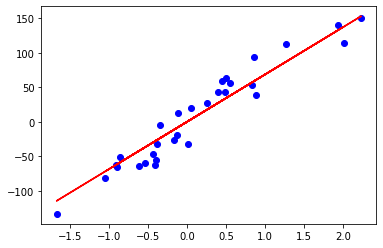

371.05178475715496


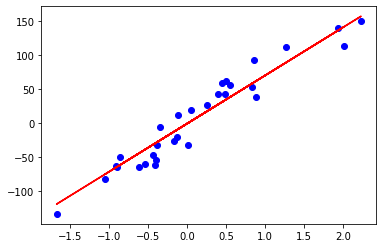

363.4288808903958


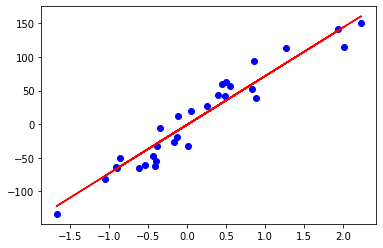

360.5012214498847


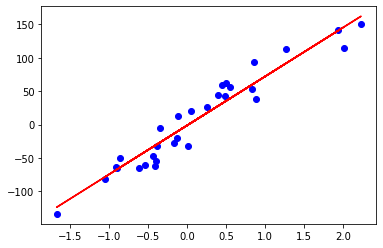

359.3714916761731


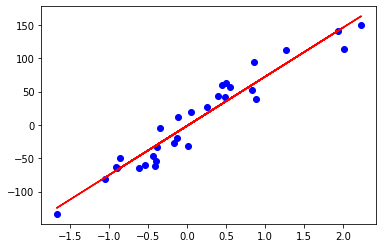

358.93407754845964


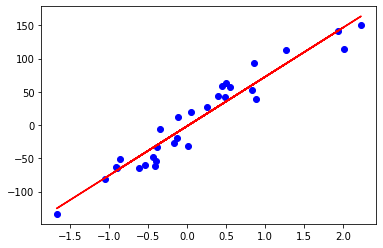

358.7643127452858


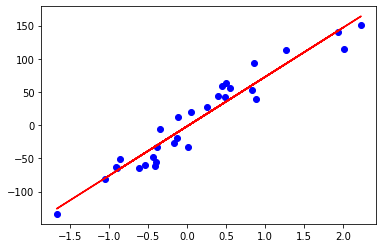

358.69831443781186


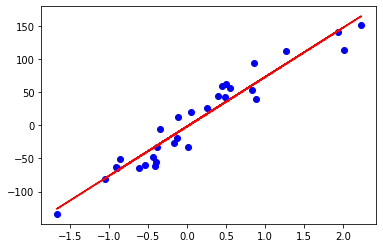

358.6726264163928


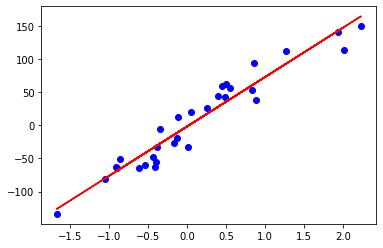

358.6626197921572


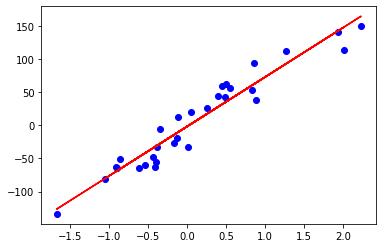

358.65871951397565


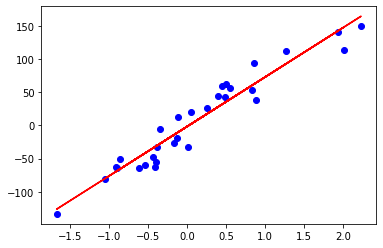

358.6571986901989


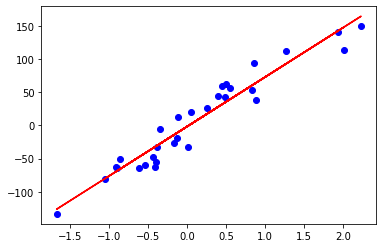

358.65660551288715


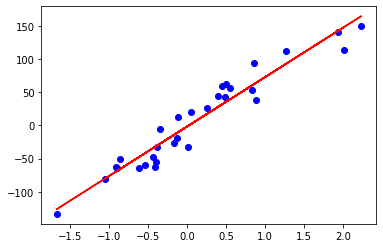

358.65637410643023


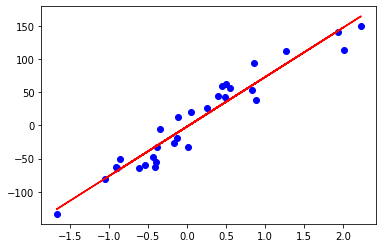

358.6562838192944


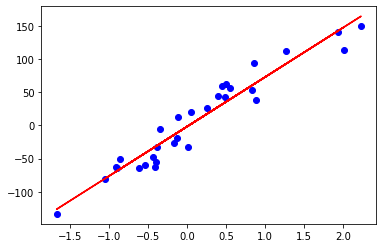

358.65624858888316


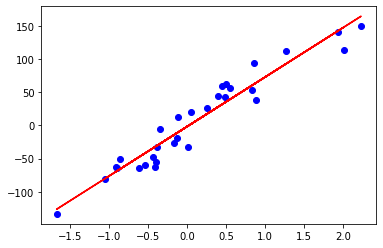

358.6562348409179


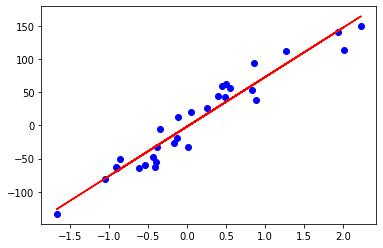

358.65622947580033


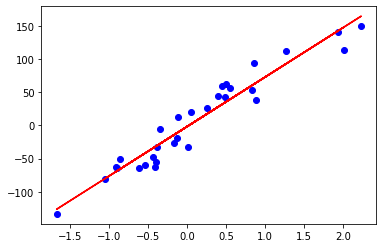

358.65622738200574


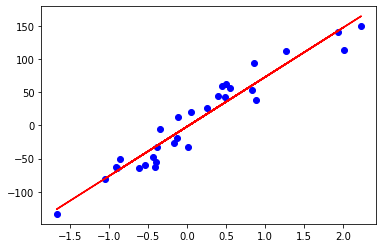

358.65622656486147


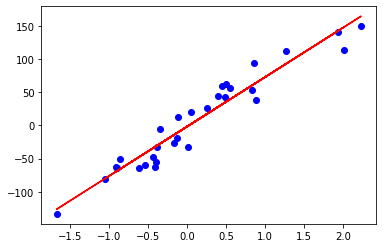

358.6562262459501


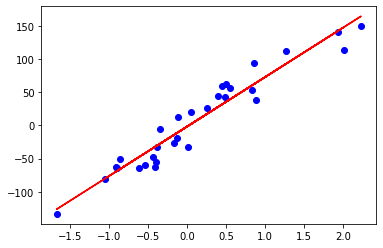

358.65622612148553


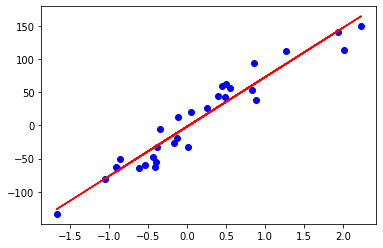

358.6562260729092


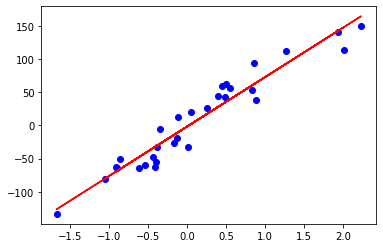

358.6562260539504


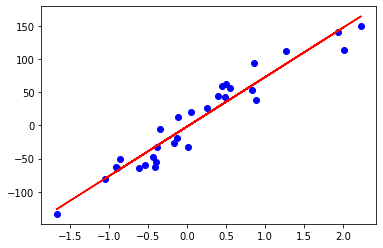

358.656226046551


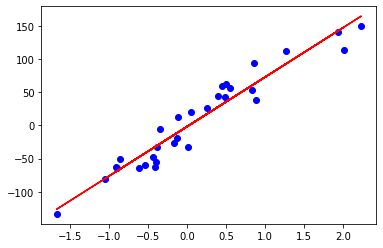

358.6562260436633


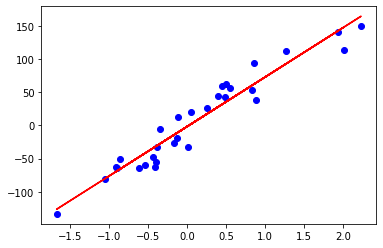

358.6562260425362


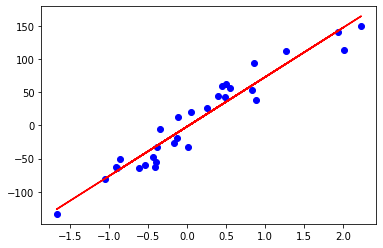

358.65622604209636


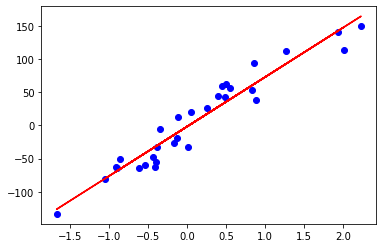

358.6562260419247


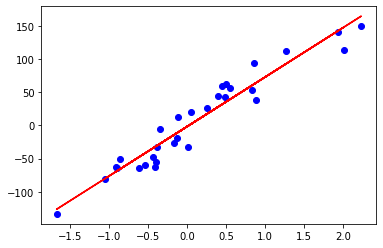

(-1.9113402659948362, 74.66812878022895)

In [ ]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=30, n_features=1, noise=20, random_state=43)

x = x.reshape(-1)

w0, w1, mse_history = gradient_descent(x, y, epochs=1000, lr=0.01)
w0, w1

Тут рисуем график-сводку наших СКО, то как они изменяются, по Х - количество эпох, по У - значение СКО

Text(0, 0.5, 'Loss (MSE)')

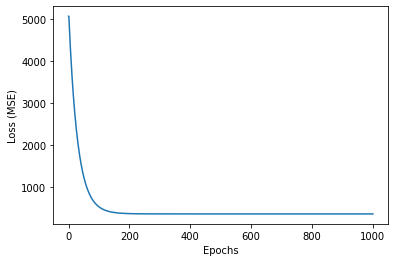

In [ ]:
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

Наш итоговый график

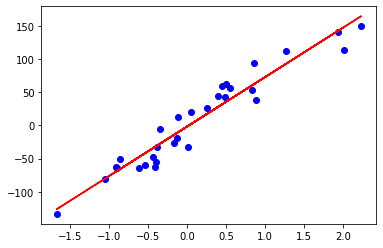

In [ ]:
plt.plot(x, y, 'bo')
plt.plot(x, w0 + w1 * x, 'r')

Посмотрим на функцию из sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x.reshape(-1, 1), y)

LinearRegression()

Коэфициенты,полученные моделью sklearn

то, что мы насчитали нашим методом

In [ ]:
print(linreg.intercept_, linreg.coef_[0]) #sklearn
print(w0, w1) #наш труд

-1.9113453310484996 74.66813758842059
-1.9113402659948362 74.66812878022895


Видим, что модели дают довольно схожий результат

* #### Стохастический градиентный спуск

Когда мы берем нашу выборку и всю ее пихаем в Loss, то видим как она убывает, но что если элиментов в выборке у нас много, кроме того мы хотим обучать нашу модель по ходу дела - тут нужен стахостический град. спуск

Отличие: градиент берется не по всей выборке

В этом случае Loss функция будет немного скакать, но в среднем всё равно будет убывать. 

Позволяет обрабатывать большую выборку или изначения, которые приходят в реальном времени.

batch - несколько значений выборки, на которых обучается прога


графики град. спуска и стох. град. спуска для Loss
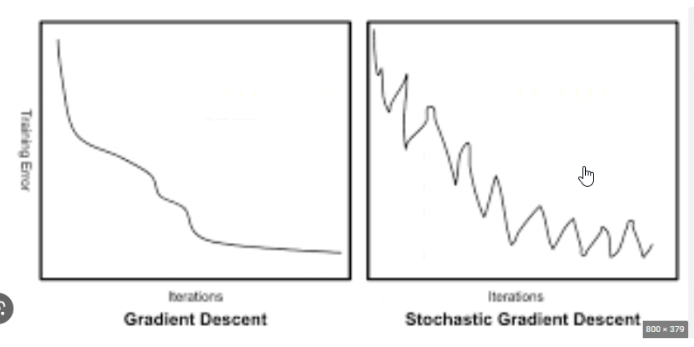

In [ ]:
def loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / (2 * len(y_true))

def loss_grad(x, y_true, w0, w1):
    grad_w0 = -2.0 * np.sum(y_true - (w0 + w1 * x)) / len(y_true)
    grad_w1 = -2.0 * np.sum((y_true - (w0 + w1 * x)) * x) / len(y_true)
    return grad_w0, grad_w1


# batch_size - размер batch, обычно берется как 2^n
def SGD(x, y, epochs=10, lr=0.001, batch_size=1):
    w0 = 0.0
    w1 = 0.0
    
    mse_history = [loss(y, w0 + w1 * x)]

    epoch = 0
    while epoch < epochs:
        indicies = np.random.randint(0, len(y), size=(batch_size,)) # берем size случйных знчений от 0 до len(y) - это индексы, которые мы сообщаем для выбора из множества Х и У(ниже пример)
        x_batch, y_batch = x[indicies], y[indicies]

        grad_w0, grad_w1 = loss_grad(x_batch, y_batch, w0, w1)

        w0 = w0 - lr * grad_w0
        w1 = w1 - lr * grad_w1
        mse_history.append(loss(y, w0 + w1 * x))

        epoch += 1
    return w0, w1, mse_history

Пример indicies, такие индексы из 1000000 элементов будут использоваться



In [ ]:
np.random.randint(0, 1000000, size=(5,))

array([147746, 944371, 251313, 815929, 405322])

Посмотрим какие коэфициенты найдет наш новый код (сделал два примера с разными batch_size)

In [ ]:
# batch_size=1
print(SGD(x, y, 10000, 0.001, 1)[0],SGD(x, y, 10000, 0.001, 1)[1],)
# batch_size=32
print(SGD(x, y, 10000, 0.001, 32)[0], SGD(x, y, 10000, 0.001, 32)[1])

-2.5395177257548793 74.60603525755684
-1.9761207801033116 74.62125795128773


Так же напомню значения, которые получили прежде

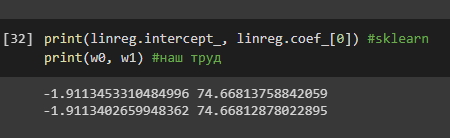

Видим, что значения похожи

Так же у нас есть mse_history, выведем график и сравним с предыдущим (выводить сами значения я смысла пока не вижу)



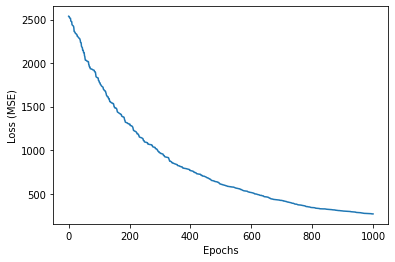

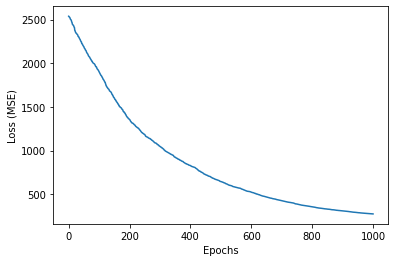

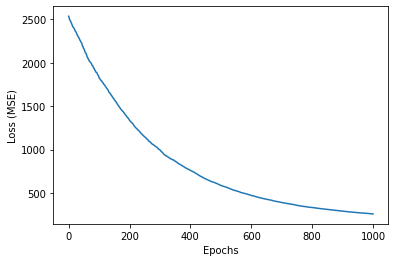

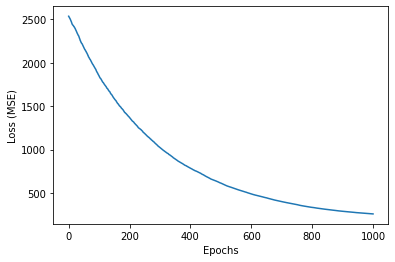

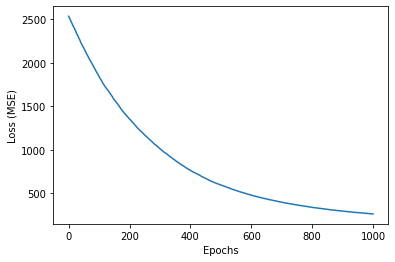

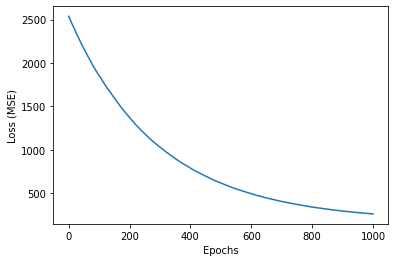

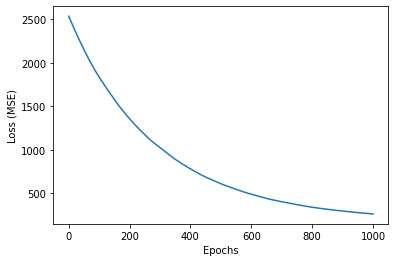

In [ ]:
#x, y = make_regression(n_samples=1000, n_features=1, noise=40, random_state=43)
#x = x.reshape(-1)

w0, w1, mse_history = SGD(x, y, epochs=1000, batch_size=1)
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

w0, w1, mse_history = SGD(x, y, epochs=1000, batch_size=4)
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

w0, w1, mse_history = SGD(x, y, epochs=1000, batch_size=8)
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

w0, w1, mse_history = SGD(x, y, epochs=1000, batch_size=16)
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

w0, w1, mse_history = SGD(x, y, epochs=1000, batch_size=32)
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

w0, w1, mse_history = SGD(x, y, epochs=1000, batch_size=64)
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

w0, w1, mse_history = SGD(x, y, epochs=1000, batch_size=128)
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

Видим, что с увеличением  batch_size график сглаживается и идет к виду обычного град. спуска

Вообще уже на 32 он гладкий, тк у нас выборка около 30 элементов, дальнейшее увеличении не имеет смысла, но решил оставить  

Так же замечу, на значения batch_size, если раньше не было понятно, что значит 2^n, то тут явный пример

Теперь рассмотрим следующее: тут меньше эпох и мы берем 1 элемент для обучения 

In [ ]:
x, y = make_regression(n_samples=1000, n_features=1, noise=40, random_state=43)
x = x.reshape(-1)
w0, w1, mse_history = SGD(x, y, epochs=100, batch_size=1)

Зафиксировали выборку


*   Построили график по всей
*   строили график по участкам

Видно, что не нарушается гладкость линейности

если уменьшить batch_size, она нарушится еще больше



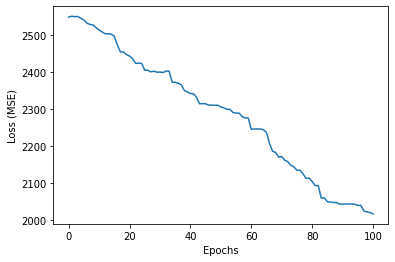

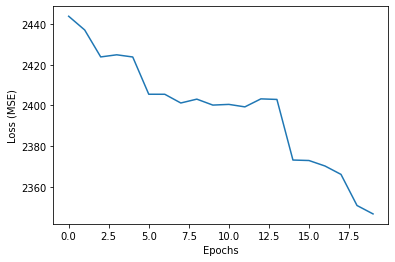

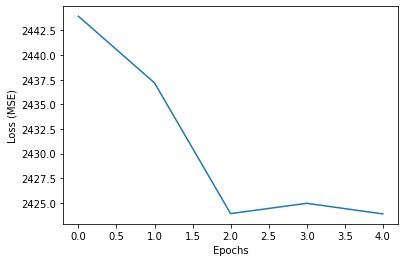

In [ ]:
plt.plot(np.arange(0, len(mse_history)), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

plt.plot(np.arange(0, 20), mse_history[20:40])
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)

plt.plot(np.arange(0, 5), mse_history[20:25])
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.pause(0.001)


не смотря на это при увеличении числа эпох (итераций) график сходится к случаю обычного град. спуска)

epochs = 100


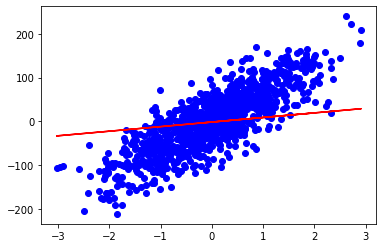

epochs = 500


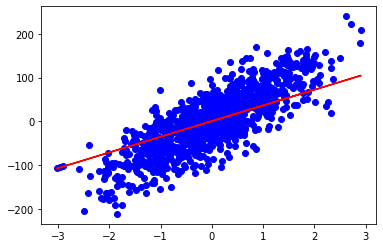

epochs = 1000


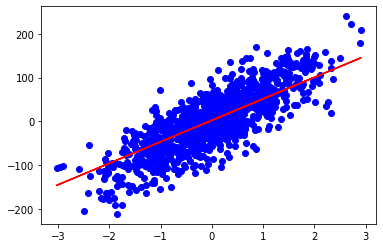

epochs = 2000


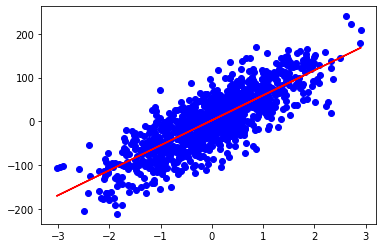

In [ ]:
ep = [100, 500, 1000, 2000, 10000] #набор эпох

for i in range (4):
  epochs = ep[i]
  w0, w1, mse_history = SGD(x, y, epochs, batch_size=1)
  print('epochs =', ep[i])
  plt.plot(x, y, 'bo')
  plt.plot(x, w0 + w1 * x, 'r')
  plt.pause(0.001)

Посмотрим функцию sklearn

Стоит упомянуть, что в библиотеке sklearn, есть методы: 
 
*   penalty

  Его суть -это наложение штрафа за сложность модели (Если модель 
сложная, то она хорошо обобщает данные на тренировачной выборке, но плохо обобщает на тесте(Переобучение)). Если по простому, то не дает запомнить слишком большие или слишком маленькие числа и переобучиться.

*   alpha. 
  
  Высчитывает lr. т.е. он становится динамическим и меняется по ходу обучения

*   early_stopping.
  
  Ранний выход. Если у нас через n операций изменение не выходит за погрешность, то мы прекращаем алгорим.


Посмотрим модель из sklearn

In [ ]:
from sklearn.linear_model import SGDRegressor

#тут считаем шаг постоянным и задаем его равным 0,001 чере eta0, максимум 1000 операций
regressor = SGDRegressor(learning_rate='constant', eta0 = 0.001,  max_iter=1000)
#ограничиваем итерации, параметры по умолчанию
regressor1 = SGDRegressor(max_iter=1000)

regressor.fit(x.reshape(-1, 1), y)
regressor1.fit(x.reshape(-1, 1), y)

SGDRegressor()

Сравниваем с нашей моделью

In [ ]:
print(regressor.coef_, regressor.intercept_, regressor.n_iter_)
print(regressor1.coef_, regressor1.intercept_, regressor1.n_iter_)
w0, w1, mse_history = SGD(x, y, epochs=2000, lr=0.001, batch_size=16)
print(w1, w0)

[58.97989298] [1.42734209] 14
[59.36912574] [1.34371077] 22
58.12781529170547 1.4351471895815477


Интересно, что на занятии значения были довольног близки, а тут они довольно сильно гуляют

Методом научного тыка подобрал значения для параметров нашей функции, чтоб они давали +- такой же результат

что видно: Функция sklearn достигает такого же значения примерно за 11-22 итераций, когда нам надо около 2000 при batch = 16. это важно. Чем это достигается? - Правильными метриками, об этом на следующем занятии.